In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import acquire
import prepare
import split
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats
import exploration
import modeling


alpha = 0.05

In [2]:
"""In a jupyter notebook, classification_exercises.ipynb, use a python 
module (pydata or seaborn datasets) containing datasets as a source 
from the iris data. Create a pandas dataframe, df_iris, from this data."""

df_iris = sns.load_dataset('iris')

# print the first 3 rows
print(df_iris.head(3))

# print the number of rows and columns (shape)
print(f"shape: {df_iris.shape}")

# print the column names
print(df_iris.columns)

# print the data type of each column
print(df_iris.info())

# print the summary statistics for each of the numeric variables
print(df_iris.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
shape: (150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333    

In [3]:
"""Read the Table1_CustDetails table from your spreadsheet exercises 
google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing 
settings."""

sheet_url = 'https://docs.google.com/spreadsheets/d/1luAKJGwksBk-zCOyqBhYRG2gc5J8X-vhAd9Cm2bLbPw/edit#gid=1023018493'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


df_google_sheets = pd.read_csv(csv_export_url)


# assign the first 100 rows to a new dataframe, df_google_sheets_sample
df_google_sheets_sample = df_google_sheets[0:100]


# print the number of rows of your original dataframe
print(len(df_google_sheets))

# print the first 5 column names
print(df_google_sheets.columns[0:5])

# print the column names that have a data type of object
# instructor answer: df.select_dtypes(include='object').columns.to_list()
print(df_google_sheets.dtypes[df_google_sheets.dtypes == 'object'])
print(df_google_sheets.info())

# compute the range for each of the numeric variables.
df_column_mask = df_google_sheets.apply(pd.api.types.is_float_dtype)
float_columns = df_google_sheets.dtypes[df_column_mask].index.to_list()

print(df_google_sheets[float_columns].apply(lambda x: x.max() - x.min()))

7049
Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')
customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn       

In [4]:
"""Read the data from this google sheet into a dataframe, df_google."""

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


df_google = pd.read_csv(csv_export_url)

# print the first 3 rows
print(df_google.head(3))

# print the number of rows and columns
print(df_google.shape)

# print the column names
print(df_google.columns)

# print the data type of each column
print(df_google.info())

# print the summary statistics for each of the numeric variables
df_column_mask = df_google.apply(pd.api.types.is_numeric_dtype)
numeric_columns = df_google.dtypes[df_column_mask]

print(df_google[numeric_columns.index].info())

# print the unique values for each of your categorical variables
# categories = df_google.select_dtypes(include=['object', 'int64']).columns.to_list()
categories = ['Survived', 'Pclass', 'Sex', 'Parch', 'Embarked']
print(df_google[categories].apply(lambda x: x.nunique() if x.nunique() < 10 else 0))




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------

In [5]:
iris_data = acquire.get_iris_data()
iris_data.head()
col_drop = ['species_id', 'measurement_id']
iris_data = iris_data.drop(columns=col_drop)
print(iris_data.head())

iris_data = iris_data.rename(columns={'species_name': 'species'})
print(iris_data.head())

   Unnamed: 0  sepal_length  sepal_width  petal_length  petal_width  \
0           0           5.1          3.5           1.4          0.2   
1           1           4.9          3.0           1.4          0.2   
2           2           4.7          3.2           1.3          0.2   
3           3           4.6          3.1           1.5          0.2   
4           4           5.0          3.6           1.4          0.2   

  species_name  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
   Unnamed: 0  sepal_length  sepal_width  petal_length  petal_width species
0           0           5.1          3.5           1.4          0.2  setosa
1           1           4.9          3.0           1.4          0.2  setosa
2           2           4.7          3.2           1.3          0.2  setosa
3           3           4.6          3.1           1.5          0.2  setosa
4           4           5.0          3.6           1.4          0.2  setosa


In [6]:
missing = iris_data.isnull().sum()
(missing[missing] > 0).sum()

dummy_df = pd.get_dummies(iris_data['species'], dummy_na=False, drop_first=True)
print(dummy_df)
iris_data = pd.concat([iris_data, dummy_df], axis=1)
iris_data


     versicolor  virginica
0             0          0
1             0          0
2             0          0
3             0          0
4             0          0
..          ...        ...
145           0          1
146           0          1
147           0          1
148           0          1
149           0          1

[150 rows x 2 columns]


,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,0,5.1,3.5,1.4,0.2,setosa,0,0
1,1,4.9,3.0,1.4,0.2,setosa,0,0
2,2,4.7,3.2,1.3,0.2,setosa,0,0
3,3,4.6,3.1,1.5,0.2,setosa,0,0
4,4,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica,0,1
146,146,6.3,2.5,5.0,1.9,virginica,0,1
147,147,6.5,3.0,5.2,2.0,virginica,0,1
148,148,6.2,3.4,5.4,2.3,virginica,0,1


In [7]:
def prep_iris(iris_df):
    col_drop = ['species_id', 'measurement_id']
    iris_data = iris_data.drop(columns=col_drop)
    

    iris_data = iris_data.rename(columns={'species_name': 'species'})
    print(iris_data.head())
    
    dummy_df = pd.get_dummies(iris_data['species'], dummy_na=False, drop_first=True)
    iris_data = pd.concat([iris_data, dummy_df], axis=1)
    
    return iris_data


In [8]:
titanic_df = acquire.get_titanic_data()

def prep_titanic(titanic_df):
    
    col_drop = ['class', 'deck', 'Unnamed: 0', 'embark_town']
    titanic_df = titanic_df.drop(columns=col_drop)
    print(titanic_df.shape)
    titanic_df = titanic_df.dropna()
    print(titanic_df.shape)
    titanic_dummy = pd.get_dummies(titanic_df[['embarked', 'sex']], dummy_na=False, drop_first=[True, True])
    
    titanic_df = pd.concat([titanic_df, titanic_dummy], axis=1)

    return titanic_df

titanic_df = acquire.get_titanic_data()
titanic_df = prep_titanic(titanic_df)
titanic_df


(891, 10)
(712, 10)


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,embarked_Q,embarked_S,sex_male
0,0,0,3,male,22.0,1,0,7.2500,S,0,0,1,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0
4,4,0,3,male,35.0,0,0,8.0500,S,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,3,female,39.0,0,5,29.1250,Q,0,1,0,0
886,886,0,2,male,27.0,0,0,13.0000,S,1,0,1,1
887,887,1,1,female,19.0,0,0,30.0000,S,1,0,1,0
889,889,1,1,male,26.0,0,0,30.0000,C,1,0,0,1


In [9]:
telco_df = acquire.get_telco_data()
print(telco_df.columns.to_list())
print(telco_df[['phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection']])
print(telco_df.info())


for c in telco_df.columns:
    print('------------------------')
    print(telco_df[c].value_counts())
    print(telco_df[c].value_counts().sum())
    
blanks = telco_df['total_charges'] != ' '
telco_df = telco_df[blanks]
telco_df.shape

['Unnamed: 0', 'contract_type_id', 'payment_type_id', 'internet_service_type_id', 'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'monthly_charges', 'total_charges', 'churn', 'internet_service_type', 'payment_type', 'contract_type']
     phone_service    multiple_lines online_security online_backup  \
0              Yes                No              No           Yes   
1              Yes               Yes              No            No   
2              Yes                No              No            No   
3              Yes                No              No           Yes   
4              Yes                No              No            No   
...            ...               ...             ...           ...   
7038           Yes                No             Yes            No   
7039        

(7032, 25)

In [10]:


duplicates = ['contract_type_id', 'payment_type_id', 'internet_service_type_id', 'customer_id']
categorical = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type', 'payment_type', 'contract_type']
lst_true = [True] * len(categorical)
print(lst_true)
telco_df = telco_df.drop(columns=duplicates)
dummies_df = pd.get_dummies(telco_df[categorical], dummy_na=False, drop_first=lst_true)
dummies_df

telco_df = pd.concat([telco_df, dummies_df], axis=1)



[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


   Unnamed: 0  sepal_length  sepal_width  petal_length  petal_width species
0           0           5.1          3.5           1.4          0.2  setosa
1           1           4.9          3.0           1.4          0.2  setosa
2           2           4.7          3.2           1.3          0.2  setosa
3           3           4.6          3.1           1.5          0.2  setosa
4           4           5.0          3.6           1.4          0.2  setosa


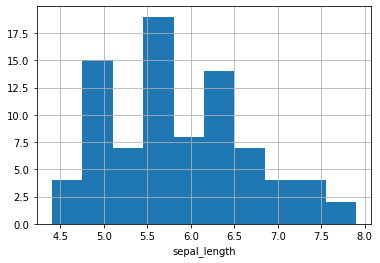

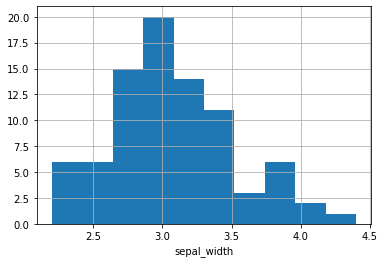

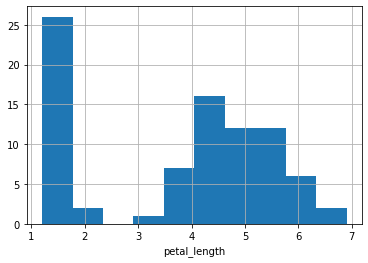

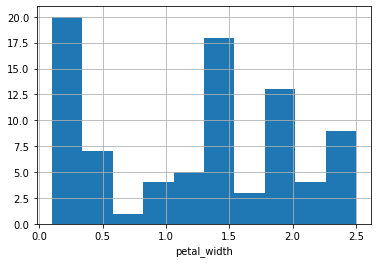

              count      mean       std  min    25%   50%  75%  max
sepal_length   84.0  5.870238  0.769099  4.4  5.375  5.80  6.4  7.9
sepal_width    84.0  3.075000  0.448256  2.2  2.800  3.00  3.4  4.4
petal_length   84.0  3.771429  1.734940  1.2  1.600  4.25  5.1  6.9
petal_width    84.0  1.203571  0.752577  0.1  0.400  1.30  1.8  2.5


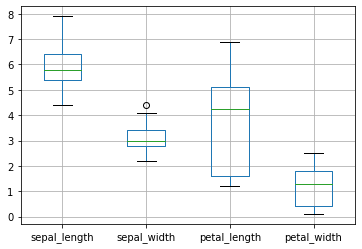

In [11]:
iris_df = acquire.get_iris_data()
iris_df = prepare.prep_iris(iris_df)

train, validate, test = split.train_validate_test_split(iris_df, 'species')

train.head()

quantitative_col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
categorical = ['species']


def quantitative_hist_boxplot_describe(training_df, quantitative_col_names):
    for col in quantitative_col_names:
        training_df[col].hist()
        plt.xlabel(col)
        plt.show()
    training_df.boxplot(column=quantitative_col_names)
    print(training_df[quantitative_col_names].describe().T)
    plt.show()
    
quantitative_hist_boxplot_describe(train, quantitative_col)




versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64


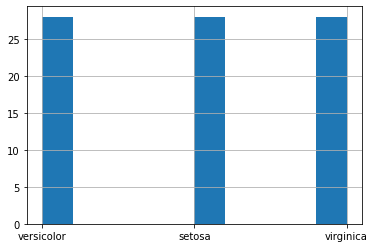

In [12]:
a_species = train.species.unique()
a_species

def target_freq_hist_count(training_df, target_col):
    training_df[target_col].hist()
    print(training_df[target_col].value_counts())
    plt.show()

target_freq_hist_count(train, 'species')


In [13]:
# Takeaways: Petal width seems to be distributed 3/4 ways, which could
# line up with our three different species. Same with sepal length.
# Those could be the two drivers that I look at that relates to species.


[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]


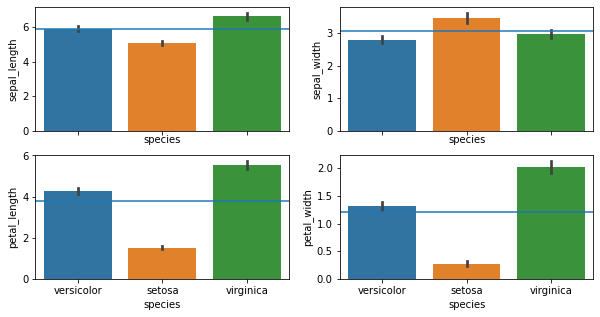

In [14]:
"""Visualize each measurement type (y-axis) with the species variable 
(x-axis) using barplots, adding a horizontal line showing the overall 
mean of the metric (y-axis)."""

def odd(num):
    if num % 2 != 0:
        return True
    else:
        return False
    
def even(num):
    return not odd(num)

def find_subplot_dim(quant_col_lst):
    
    # goal: make x 
    # checks if len is even (making 2 rows)
    if even(len(quant_col_lst)):
        length = len(quant_col_lst)
    else:
        length = len(quant_col_lst) + 1
        
    divided_by_2 = int(length/ 2)
    divided_by_other_factor = int(length / divided_by_2)
    subplot_dim = [divided_by_2, divided_by_other_factor]
    
    return subplot_dim

def quant_vs_target_bar(train_df, target_col, quant_col_lst, mean_line=False):
    
    subplot_dim = find_subplot_dim(quant_col_lst)
    
    plots = []
    fig, axes = plt.subplots(subplot_dim[0], subplot_dim[1], sharex=True, figsize=(10,5))
    
    for axe in axes:
        for ax in axe:
            plots.append(ax)
    print(plots)

    for n in range(len(quant_col_lst)):    
        sns.barplot(ax=plots[n], x=train_df[target_col], y =train_df[quant_col_lst[n]])
        
        if mean_line:
            avg = train_df[quant_col_lst[n]].mean()
            plots[n].axhline(avg,  label=f'Avg {train_df[quant_col_lst[n]]}')
        

quant_vs_target_bar(train, 'species', quantitative_col, mean_line=True)

In [15]:
"""For each measurement type, compute the descriptive statistics for 
each species."""

a_species


def describe_quant_grouped_by_target(training_df, quantitative_col, 
                                     target_col):
    lst_cpy = quantitative_col[:]
    lst_cpy.append(target_col)
    
    print(training_df[lst_cpy].groupby(target_col).describe().T)
    
describe_quant_grouped_by_target(train, quantitative_col, 'species')

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.089286    5.896429   6.625000
             std     0.360390    0.425556   0.532378
             min     4.400000    4.900000   5.800000
             25%     4.875000    5.600000   6.300000
             50%     5.000000    5.800000   6.450000
             75%     5.400000    6.125000   6.900000
             max     5.800000    6.900000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.467857    2.796429   2.960714
             std     0.427788    0.280848   0.318956
             min     2.300000    2.300000   2.200000
             25%     3.275000    2.600000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.800000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.507143    4.271429   5.

In [16]:
"""For virginica & versicolor: Compare the mean petal_width using 
the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is
a significant difference between the two groups. Do the same for the
other measurement types."""


def target_subsets(target_col, training_df):
    
    values = training_df[target_col].unique()
    subset_dict= {}
    
    for val in values:
        subset_dict[val] = training_df[training_df[target_col]==val]
        
    return subset_dict

def combinations_of_subsets(target_col, training_df):
    subsets = target_subsets(target_col, training_df)
    combos = list(itertools.combinations(subsets.keys(), 2))
    
    return subsets, combos

def mannshitneyu_for_quant_by_target(target_col, training_df, 
                                    quantitative_col):
    
    predictors = {}
    subsets, combos = combinations_of_subsets(target_col, training_df)
    p_exceeds_alpha = []
        

    for i, pair in enumerate(combos):
        
        #print(f'{pair[0]}/{pair[1]}:' )
        predictors[str(pair)] = []
        for col in quantitative_col:
            t, p = stats.mannwhitneyu(subsets[pair[0]][col], 
                                      subsets[pair[1]][col])
            #print(f'{pair[0]}/{pair[1]} {col}:')
            #print(f't: {t}, p: {p}\n')
            
            if p < alpha:
                predictors[str(pair)].append({col: [t, p]})
            else:
                p_exceeds_alpha.append([str(pair), col, t, p])
                
                
    return subsets, predictors, p_exceeds_alpha, combos
            
    
def print_mannswhitneyu_predictors(predictors):
    for keys, values in predictors.items():
        print(keys)
        for value in values:
            print(value)
        print()
    
def print_mannswhitneyu_failures(p_exceeds_alpha):
    for val in p_exceeds_alpha:
        print(f'Combination: {val[0]}')
        print(f'Measurement: {val[1]}')
        print(f't: {val[2]}, p: {val[3]}')
        print()
        
def print_quant_by_target(target_col, training_df, quant_col):
    subsets, predictors, p_exceeds_alpha, combos = mannshitneyu_for_quant_by_target(target_col, 
                                                                            training_df, 
                                                                            quant_col)
    print_mannswhitneyu_predictors(predictors)
    print_mannswhitneyu_failures(p_exceeds_alpha)
    
    combo_predic = {}
    for combo in combos:
        combo_predic[combo] = []
        print(predictors[str(combo)])
        for predic in predictors[str(combo)]:
              print(list(predic.keys())[0])
              combo_predic[combo].append(list(predic.keys())[0])

    return subsets, predictors, p_exceeds_alpha, combo_predic
    
subsets, predictors, p_exceeds_alpha, combos = print_quant_by_target('species', train, quantitative_col)


    


('versicolor', 'setosa')
{'sepal_length': [728.5, 3.38902518496528e-08]}
{'sepal_width': [67.5, 9.838378298699357e-08]}
{'petal_length': [784.0, 1.280026689526043e-10]}
{'petal_width': [784.0, 8.337173413494075e-11]}

('versicolor', 'virginica')
{'sepal_length': [107.5, 3.082029196534108e-06]}
{'petal_length': [7.5, 2.9479835715150625e-10]}
{'petal_width': [17.0, 6.47119166980993e-10]}

('setosa', 'virginica')
{'sepal_length': [1.0, 1.4320631271373019e-10]}
{'sepal_width': [664.5, 7.68824715496567e-06]}
{'petal_length': [0.0, 1.2763147530342772e-10]}
{'petal_width': [0.0, 8.941874653666594e-11]}

Combination: ('versicolor', 'virginica')
Measurement: sepal_width
t: 274.0, p: 0.05257259139845694

[{'sepal_length': [728.5, 3.38902518496528e-08]}, {'sepal_width': [67.5, 9.838378298699357e-08]}, {'petal_length': [784.0, 1.280026689526043e-10]}, {'petal_width': [784.0, 8.337173413494075e-11]}]
sepal_length
sepal_width
petal_length
petal_width
[{'sepal_length': [107.5, 3.082029196534108e-06]}

In [17]:
# Takeaways: sepal width doesn't seem to be a good predictor in difference
# between virginica and versicolor. petal length and petal width seem to
# have the biggest differences.

# N_0: There is no difference in Petal length/Petal width between virginica/versicolor.
# N_1: There is a significant difference in petal lenght/width between virginica/versicolor





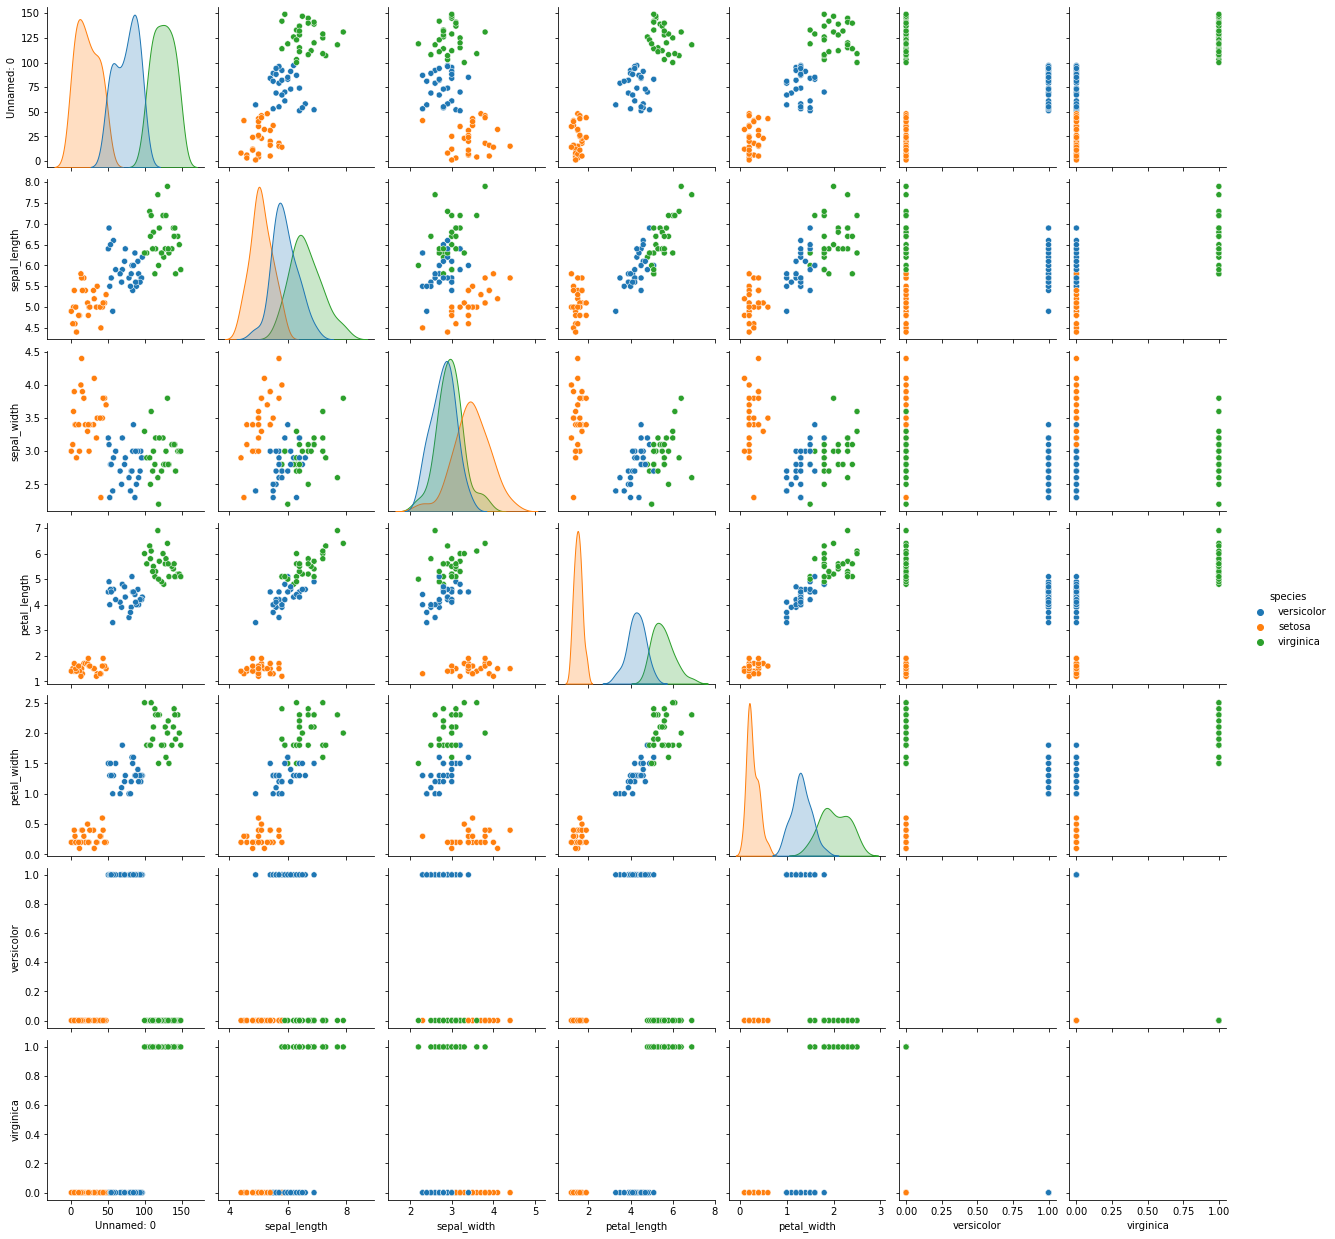

In [18]:
"""Visualize the interaction of each measurement type with the others 
using a pairplot (or scatter matrix or something similar) and add 
color to represent species.
"""

sns.pairplot(train, hue='species')

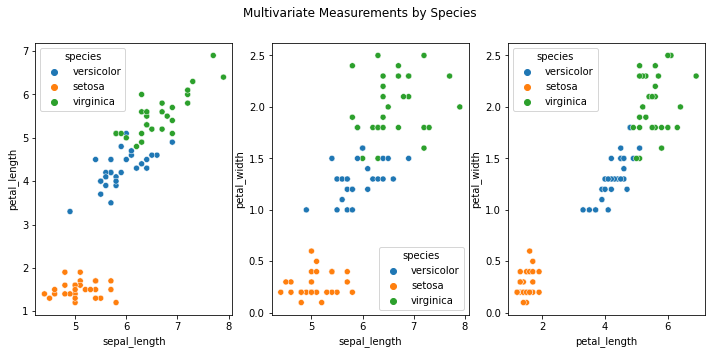

In [19]:
"""Visualize two numeric variables by means of the species. 
Hint: sns.relplot with hue or col
"""
def create_subplots(quant_cols, single_var=True):
    subplot_dim = find_subplot_dim(quant_cols)
    plots= []
    fig, axes = plt.subplots(subplot_dim[0], subplot_dim[1])
    
    for axe in axes:
        for ax in axe:
            plots.append(ax)
            
    return plots
            



def two_quants_by_target_var(target_col, training_df, combo_predic, 
                         subtitle=""):
    
    for combo in combo_predic.keys():
        subplot_dim= find_subplot_dim(combo_predic[combo])
        
    
        plots = []
        fig, axes = plt.subplots(subplot_dim[0], subplot_dim[1], sharex=True, figsize=(10,5))
        
        for axe in axes:
            for ax in axe:
                plots.append(ax)
                
                
        
        predictors_comb = list(itertools.combinations(combo_predic[combo], 2))
    
        for i, pair in enumerate(predictors_comb):
            sns.scatterplot(x=training_df[pair[0]], y=training_df[pair[1]],
                           hue=training_df[target_col],
                           ax= plots[i])
        plt.show()

    

fig, axes = plt.subplots(1,3, figsize=(12,5))

fig.suptitle('Multivariate Measurements by Species')
our_predic = ['sepal_length', 'petal_length', 'petal_width']



predic_combos = list(itertools.combinations(our_predic, 2))

plots = [axes[0], axes[1], axes[2]]

for i, pair in enumerate(predic_combos):
    sns.scatterplot(x=train[pair[0]], y=train[pair[1]],hue=train.species, ax=plots[i])
plt.show()




# Telco Data Exploration

In [20]:
"""Explore your telco data to discover drivers of churn
"""

telco_df, categories, quant_cols = prepare.acquire_prep_telco()

train, validate, test = split.train_validate_test_split(telco_df, 'churn')
train.head()

,Unnamed: 0,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
5919,5919,1,0,0,0,58.0,1,1.0,1.0,1.0,...,1.0,0.0,0.0,1,71.10,4299.20,0,DSL,Credit card (automatic),One year
1915,1915,0,0,0,1,71.0,1,1.0,1.0,1.0,...,0.0,0.0,0.0,1,85.45,6028.95,0,Fiber optic,Credit card (automatic),One year
5054,5054,1,0,1,1,35.0,1,1.0,None,None,...,None,None,None,1,25.75,882.55,0,None,Electronic check,Month-to-month
2355,2355,0,0,1,1,1.0,1,0.0,None,None,...,None,None,None,0,19.20,19.20,0,None,Mailed check,Month-to-month
6279,6279,0,1,0,0,20.0,1,0.0,1.0,0.0,...,1.0,0.0,0.0,0,54.00,1055.90,0,DSL,Mailed check,One year


Plots: [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]


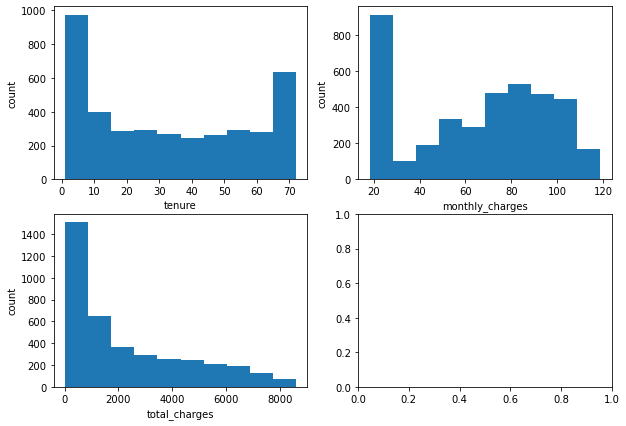

<class 'pandas.core.frame.DataFrame'>
Plots: [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]


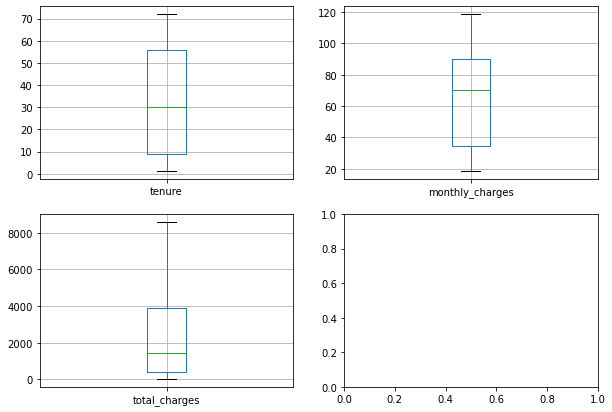

                  count         mean          std    min    25%      50%  \
tenure           3937.0    32.775210    24.709604   1.00    9.0    30.00   
monthly_charges  3937.0    64.805131    30.294804  18.25   34.7    70.25   
total_charges    3937.0  2316.775641  2284.984394  18.85  396.1  1414.80   

                    75%      max  
tenure             56.0    72.00  
monthly_charges    90.3   118.65  
total_charges    3893.6  8594.40  
0    2891
1    1046
Name: churn, dtype: int64


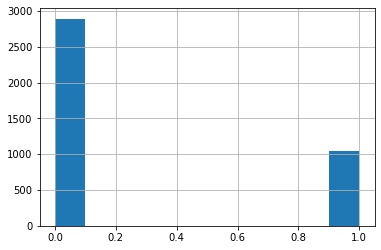

churn                            0            1
tenure          count  2891.000000  1046.000000
                mean     38.003459    18.325048
                std      24.177715    19.960763
                min       1.000000     1.000000
                25%      15.000000     2.000000
                50%      39.000000    10.000000
                75%      61.000000    31.000000
                max      72.000000    72.000000
monthly_charges count  2891.000000  1046.000000
                mean     61.218091    74.719216
                std      31.349533    24.593969
                min      18.250000    18.850000
                25%      25.000000    59.525000
                50%      64.500000    79.850000
                75%      89.025000    94.237500
                max     118.650000   118.350000
total_charges   count  2891.000000  1046.000000
                mean   2583.071792  1580.769742
                std    2343.182641  1934.641968
                min      18.850000    18

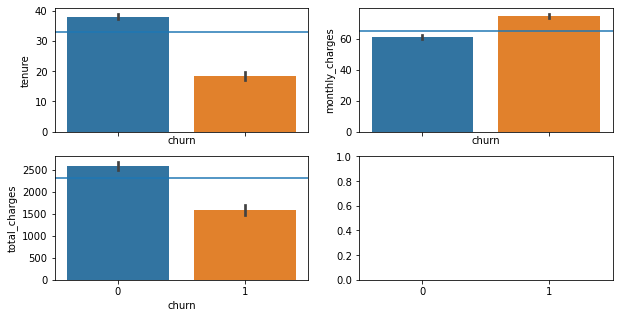

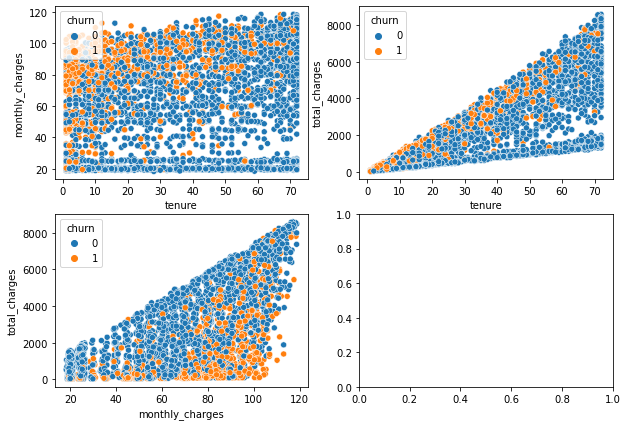

Categories related to churn:
senior_citizen
partner
dependents
multiple_lines
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
paperless_billing
internet_service_type
payment_type
contract_type


,tenure,monthly_charges,total_charges,senior_citizen,partner,dependents,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,internet_service_type,payment_type,contract_type,churn
5919,58.0,71.10,4299.20,0,0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,DSL,Credit card (automatic),One year,0
1915,71.0,85.45,6028.95,0,0,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,Fiber optic,Credit card (automatic),One year,0
5054,35.0,25.75,882.55,0,1,1,1.0,None,None,None,None,None,None,1,None,Electronic check,Month-to-month,0
2355,1.0,19.20,19.20,0,1,1,0.0,None,None,None,None,None,None,0,None,Mailed check,Month-to-month,0
6279,20.0,54.00,1055.90,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,DSL,Mailed check,One year,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,24.0,88.95,2072.75,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,Fiber optic,Credit card (automatic),Month-to-month,0
3763,10.0,100.25,1064.65,0,1,1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,Fiber optic,Electronic check,Month-to-month,1
3444,22.0,25.25,555.40,0,1,1,1.0,None,None,None,None,None,None,0,None,Credit card (automatic),Two year,0
1002,22.0,89.10,1949.40,0,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,Fiber optic,Credit card (automatic),Month-to-month,0


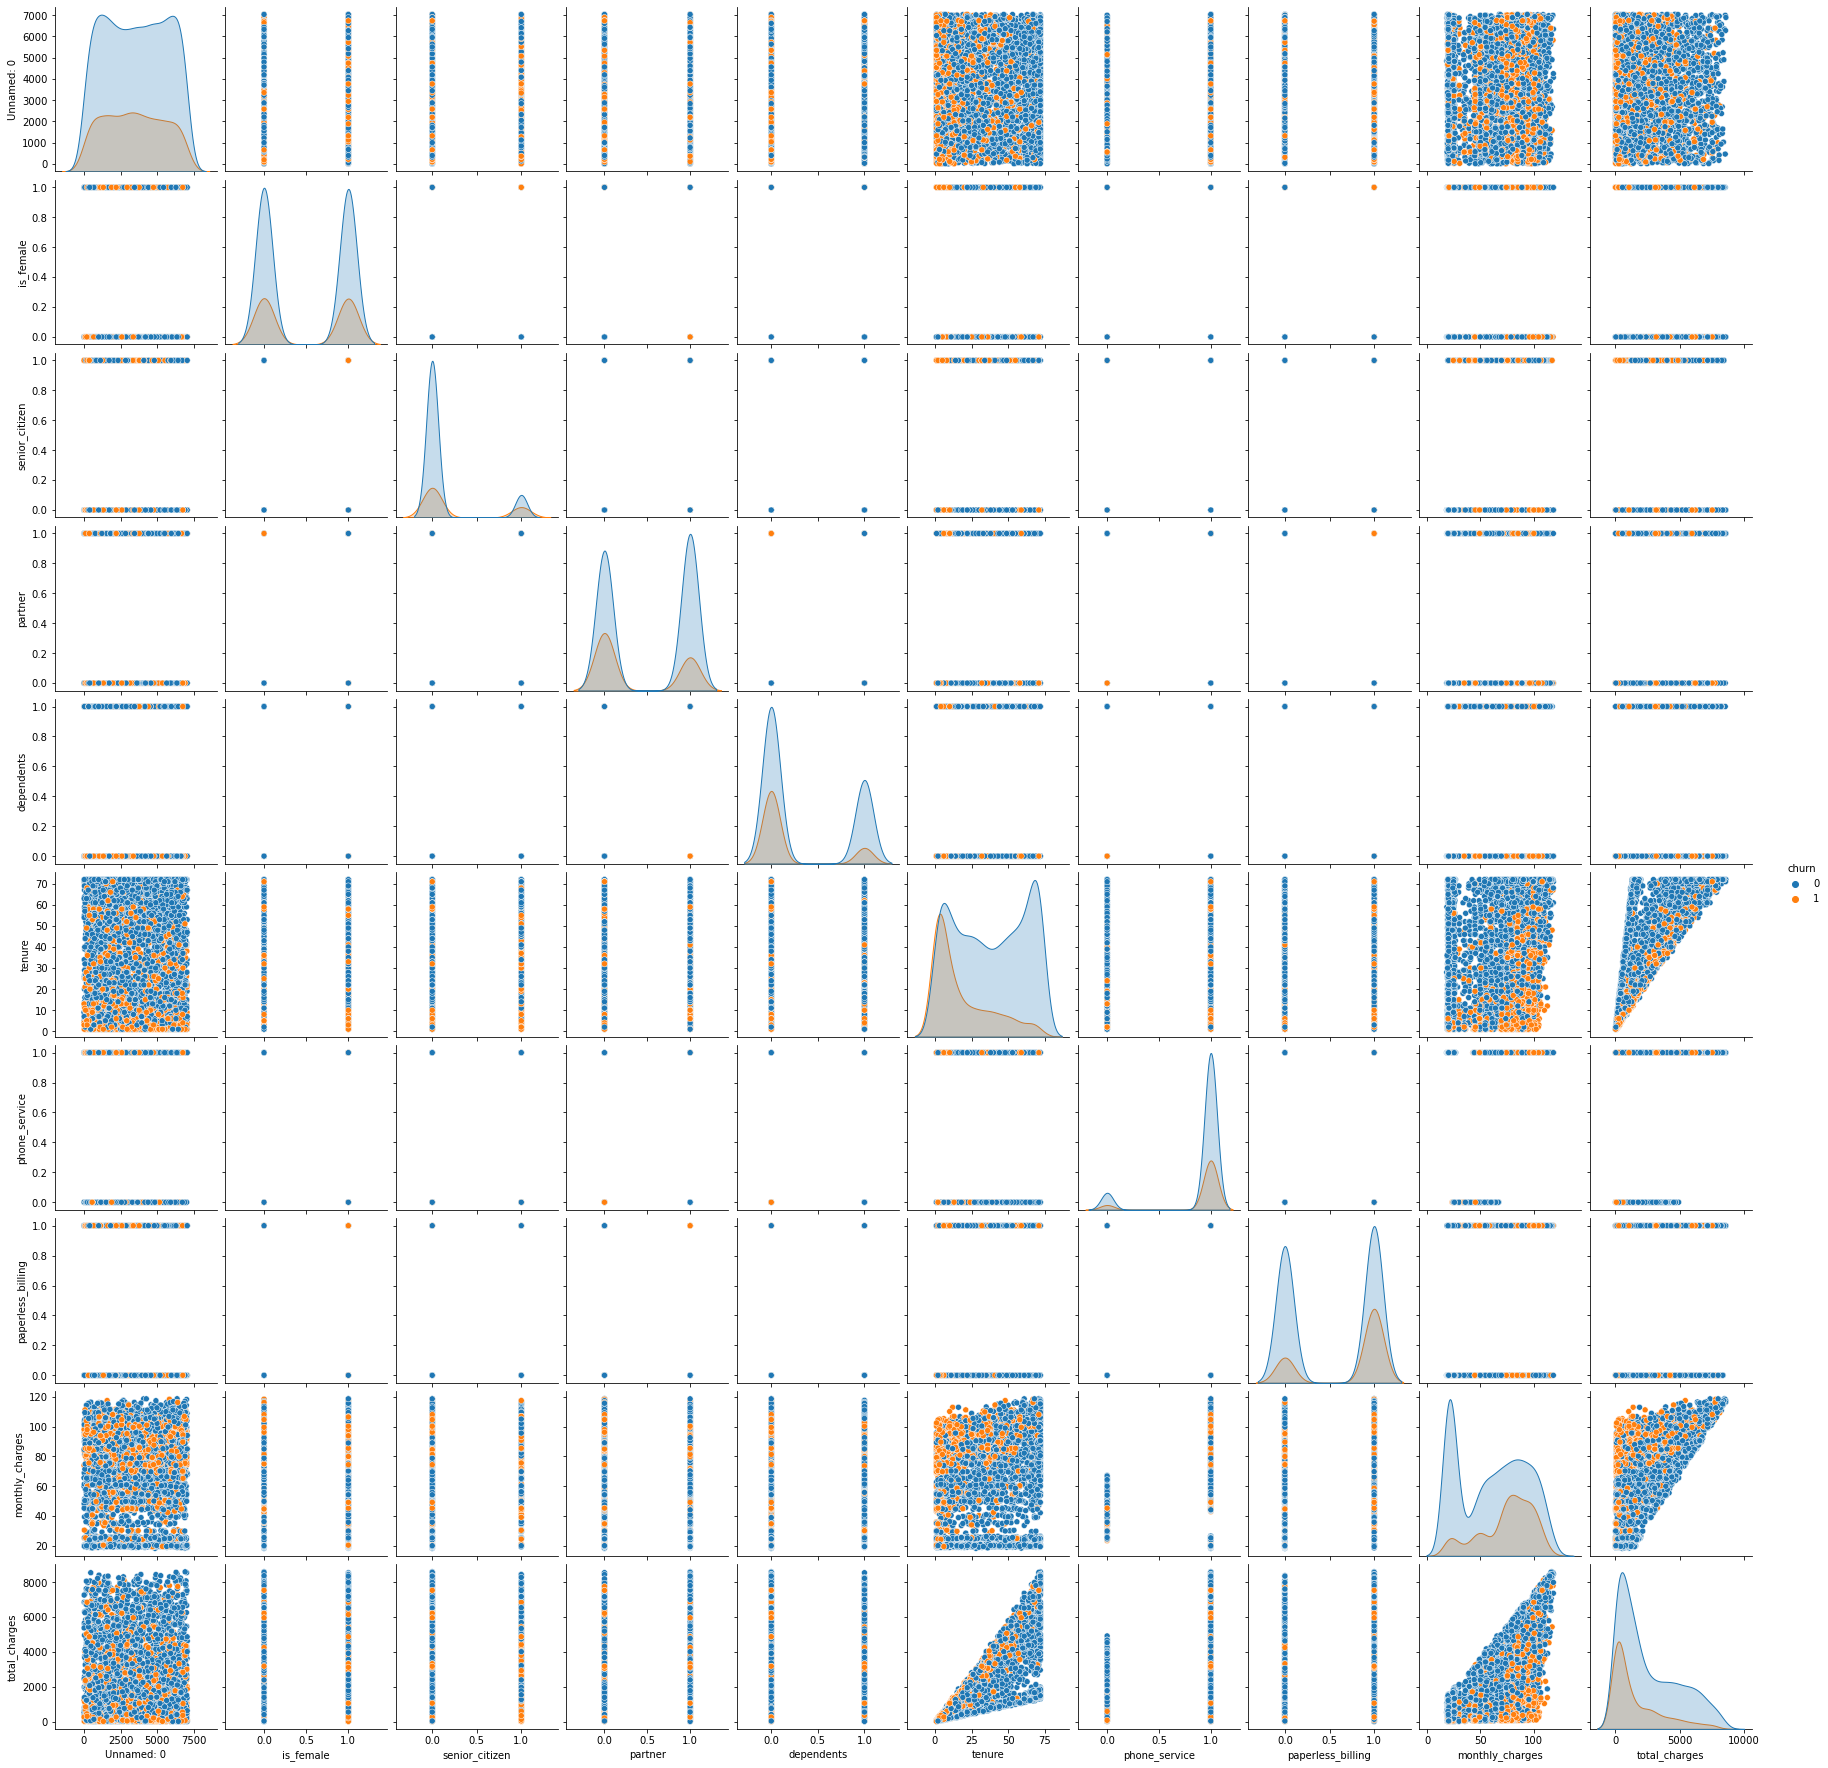

In [21]:
exploration.overview(train, categories, quant_cols, 'churn')


In [22]:
validate = validate[train.columns]

In [23]:
train= prepare.encode_object_columns(train)
train

,is_female,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,streaming_tv_None,streaming_movies_1.0,streaming_movies_None,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year
5919,1,0,0,0,58.0,1,1,71.10,4299.20,0,...,0,0,0,0,0,1,0,0,1,0
1915,0,0,0,1,71.0,1,1,85.45,6028.95,0,...,0,0,0,1,0,1,0,0,1,0
5054,1,0,1,1,35.0,1,1,25.75,882.55,0,...,1,0,1,0,1,0,1,0,0,0
2355,0,0,1,1,1.0,1,0,19.20,19.20,0,...,1,0,1,0,1,0,0,1,0,0
6279,0,1,0,0,20.0,1,0,54.00,1055.90,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1,0,0,0,24.0,1,1,88.95,2072.75,0,...,0,0,0,1,0,1,0,0,0,0
3763,1,0,1,1,10.0,1,1,100.25,1064.65,1,...,0,1,0,1,0,0,1,0,0,0
3444,1,0,1,1,22.0,1,0,25.25,555.40,0,...,1,0,1,0,1,1,0,0,0,1
1002,0,0,0,1,22.0,1,1,89.10,1949.40,0,...,0,0,0,1,0,1,0,0,0,0


In [24]:
validate = prepare.encode_object_columns(validate)
validate


,is_female,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,streaming_tv_None,streaming_movies_1.0,streaming_movies_None,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year
816,1,0,1,0,27.0,1,0,95.00,2462.55,0,...,0,1,0,1,0,1,0,0,0,0
1488,1,0,1,0,71.0,1,0,89.30,6388.65,0,...,0,1,0,0,0,1,0,0,0,1
4796,0,0,0,0,44.0,0,1,54.00,2440.25,0,...,0,1,0,0,0,0,1,0,1,0
3213,1,0,1,1,27.0,1,0,19.90,550.10,0,...,1,0,1,0,1,0,0,1,0,1
5026,0,0,1,1,62.0,1,0,20.05,1263.90,0,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,0,0,1,1,62.0,1,1,89.10,5411.65,0,...,0,0,0,1,0,1,0,0,0,1
1279,0,0,0,0,48.0,1,1,106.10,5082.80,1,...,0,1,0,1,0,1,0,0,1,0
2281,0,0,1,1,72.0,1,1,116.60,8337.45,0,...,0,1,0,1,0,0,0,0,0,1
2536,0,0,0,1,17.0,1,0,80.85,1445.95,0,...,0,1,0,0,0,0,1,0,1,0


In [25]:
train

,is_female,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,...,streaming_tv_None,streaming_movies_1.0,streaming_movies_None,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_One year,contract_type_Two year
5919,1,0,0,0,58.0,1,1,71.10,4299.20,0,...,0,0,0,0,0,1,0,0,1,0
1915,0,0,0,1,71.0,1,1,85.45,6028.95,0,...,0,0,0,1,0,1,0,0,1,0
5054,1,0,1,1,35.0,1,1,25.75,882.55,0,...,1,0,1,0,1,0,1,0,0,0
2355,0,0,1,1,1.0,1,0,19.20,19.20,0,...,1,0,1,0,1,0,0,1,0,0
6279,0,1,0,0,20.0,1,0,54.00,1055.90,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1,0,0,0,24.0,1,1,88.95,2072.75,0,...,0,0,0,1,0,1,0,0,0,0
3763,1,0,1,1,10.0,1,1,100.25,1064.65,1,...,0,1,0,1,0,0,1,0,0,0
3444,1,0,1,1,22.0,1,0,25.25,555.40,0,...,1,0,1,0,1,1,0,0,0,1
1002,0,0,0,1,22.0,1,1,89.10,1949.40,0,...,0,0,0,1,0,1,0,0,0,0


In [26]:
print(validate.shape)
print(train.shape)

(1688, 31)
(3937, 31)


In [27]:
modeling.decision_tree(train, validate, test, 'churn', depth=8, loop=True)

Classification Report for Tree with 1 depth on training set:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      2891
           1       0.00      0.00      0.00      1046

    accuracy                           0.73      3937
   macro avg       0.37      0.50      0.42      3937
weighted avg       0.54      0.73      0.62      3937

Classification Report for Tree with 1 depth on validate set:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1239
           1       0.00      0.00      0.00       449

    accuracy                           0.73      1688
   macro avg       0.37      0.50      0.42      1688
weighted avg       0.54      0.73      0.62      1688

Classification Report for Tree with 2 depth on training set:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.38      0.50      10